In [ ]:
# Import the libraries
import pandas as pd
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Import utilities
import utilities
import importlib
importlib.reload(utilities)

<module 'utilities' from '/Users/mariannemittelstadt/Desktop/AI_Bootcamp/Project2/Project2_Bank_Customer_Churn_c/Project2_Bank_Customer_Churn/utilities.py'>

In [3]:
# Read in the csv file
df = pd.read_csv('Resources/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# Look at complain correlation to exited
correlation = df['Exited'].corr(df['Complain'])
correlation

0.9956925015718864

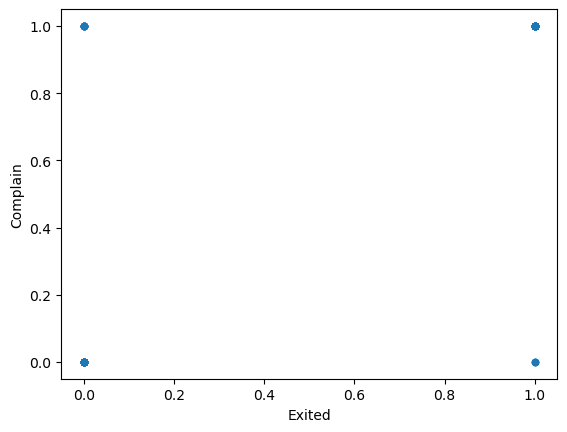

In [5]:
# Graph Exited and Complain
df.plot(kind='scatter', x='Exited', y='Complain')

# Show the plot
plt.show()

In [6]:
# Create the support vector machine classifier with a 'linear' kernel
svm_model = SVC(probability=True)

In [7]:
# Retrieve model scores utilizing utilities pipeline
scores = utilities.processData(df, svm_model)

Accuracy Score: 0.851
Balanced accuracy Score: 0.6458544123910817
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.82      0.31      0.45       393

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.68      2000
weighted avg       0.85      0.85      0.82      2000

auc Score:  0.8233515583064551


In [8]:
# Establish parameters to test for best accuracy
param_grid = {

    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']  # You can also try 'linear', 'poly', etc.
}

In [9]:
# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='balanced_accuracy')

In [10]:
# Retrieve GridSearchCV model scores leveraging utilities pipeline
scores_gscv = utilities.processData(df, grid_search)

Accuracy Score: 0.8415
Balanced accuracy Score: 0.7062604603587042
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1607
           1       0.62      0.48      0.55       393

    accuracy                           0.84      2000
   macro avg       0.75      0.71      0.72      2000
weighted avg       0.83      0.84      0.83      2000

auc Score:  0.7963664058801269


In [11]:
# View the best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
